In [ ]:
# import os
# import threading
# import numpy as np


# if os.environ.get('KERAS_BACKEND', 'tensorflow') == 'tensorflow':
#     from tensorflow.keras.models import Model
#     from tensorflow.keras.layers import Input, Dense, LSTM, Conv1D, \
#         BatchNormalization, Dropout, MaxPooling1D, Flatten
#     from tensorflow.keras.optimizers import SGD
#     from tensorflow.keras import backend
#     os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# elif os.environ['KERAS_BACKEND'] == 'plaidml.keras.backend':
#     from keras.models import Model
#     from keras.layers import Input, Dense, LSTM, Conv1D, \
#         BatchNormalization, Dropout, MaxPooling1D, Flatten
#     from keras.optimizers import SGD

In [ ]:
# class Network:
#     lock = threading.Lock()

#     def __init__(self, input_dim=0, output_dim=0, lr=0.001, 
#                 shared_network=None, activation='sigmoid', loss='mse'):
#         self.input_dim = input_dim
#         self.output_dim = output_dim
#         self.lr = lr
#         self.shared_network = shared_network
#         self.activation = activation
#         self.loss = loss
#         self.model = None

#     def predict(self, sample):
#         with self.lock:
#             pred = self.model.predict_on_batch(sample).flatten()
#             return pred

#     def train_on_batch(self, x, y):
#         loss = 0.
#         with self.lock:
#             history = self.model.fit(x, y, epochs=10, verbose=False)
#             loss += np.sum(history.history['loss'])
#         return loss

#     def save_model(self, model_path):
#         if model_path is not None and self.model is not None:
#             self.model.save_weights(model_path, overwrite=True)

#     def load_model(self, model_path):
#         if model_path is not None:
#             self.model.load_weights(model_path)

#     @classmethod
#     def get_shared_network(cls, net='dnn', num_steps=1, input_dim=0, output_dim=0):
#         # output_dim은 pytorch에서 필요
#         if net == 'dnn':
#             return DNN.get_network_head(Input((input_dim,)))
#         elif net == 'lstm':
#             return LSTMNetwork.get_network_head(Input((num_steps, input_dim)))
#         elif net == 'cnn':
#             return CNN.get_network_head(Input((num_steps, input_dim)))
    

# class DNN(Network):
#     def __init__(self, *args, **kwargs):
#         super().__init__(*args, **kwargs)
#         inp = None
#         output = None
#         if self.shared_network is None:
#             inp = Input((self.input_dim,))
#             output = self.get_network_head(inp).output
#         else:
#             inp = self.shared_network.input
#             output = self.shared_network.output
#         output = Dense(
#             self.output_dim, activation=self.activation, 
#             kernel_initializer='random_normal')(output)
#         self.model = Model(inp, output)
#         self.model.compile(
#             optimizer=SGD(learning_rate=self.lr), loss=self.loss)

#     @staticmethod
#     def get_network_head(inp):
#         output = Dense(256, activation='sigmoid', 
#             kernel_initializer='random_normal')(inp)
#         output = BatchNormalization()(output)
#         output = Dropout(0.1)(output)
#         output = Dense(128, activation='sigmoid', 
#             kernel_initializer='random_normal')(output)
#         output = BatchNormalization()(output)
#         output = Dropout(0.1)(output)
#         output = Dense(64, activation='sigmoid', 
#             kernel_initializer='random_normal')(output)
#         output = BatchNormalization()(output)
#         output = Dropout(0.1)(output)
#         output = Dense(32, activation='sigmoid', 
#             kernel_initializer='random_normal')(output)
#         output = BatchNormalization()(output)
#         output = Dropout(0.1)(output)
#         return Model(inp, output)

#     def train_on_batch(self, x, y):
#         x = np.array(x).reshape((-1, self.input_dim))
#         return super().train_on_batch(x, y)

#     def predict(self, sample):
#         sample = np.array(sample).reshape((1, self.input_dim))
#         return super().predict(sample)
    

# class LSTMNetwork(Network):
#     def __init__(self, *args, num_steps=1, **kwargs):
#         super().__init__(*args, **kwargs)
#         self.num_steps = num_steps
#         inp = None
#         output = None
#         if self.shared_network is None:
#             inp = Input((self.num_steps, self.input_dim))
#             output = self.get_network_head(inp).output
#         else:
#             inp = self.shared_network.input
#             output = self.shared_network.output
#         output = Dense(
#             self.output_dim, activation=self.activation, 
#             kernel_initializer='random_normal')(output)
#         self.model = Model(inp, output)
#         self.model.compile(
#             optimizer=SGD(learning_rate=self.lr), loss=self.loss)

#     @staticmethod
#     def get_network_head(inp):
#         # cuDNN 사용을 위한 조건
#         # https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM
#         output = LSTM(256, dropout=0.1, return_sequences=True,
#                     kernel_initializer='random_normal')(inp)
#         output = BatchNormalization()(output)
#         output = LSTM(128, dropout=0.1, return_sequences=True,
#                     kernel_initializer='random_normal')(output)
#         output = BatchNormalization()(output)
#         output = LSTM(64, dropout=0.1, return_sequences=True,
#                     kernel_initializer='random_normal')(output)
#         output = BatchNormalization()(output)
#         output = LSTM(32, dropout=0.1, kernel_initializer='random_normal')(output)
#         output = BatchNormalization()(output)
#         return Model(inp, output)

#     def train_on_batch(self, x, y):
#         x = np.array(x).reshape((-1, self.num_steps, self.input_dim))
#         return super().train_on_batch(x, y)

#     def predict(self, sample):
#         sample = np.array(sample).reshape((1, self.num_steps, self.input_dim))
#         return super().predict(sample)


# class CNN(Network):
#     def __init__(self, *args, num_steps=1, **kwargs):
#         super().__init__(*args, **kwargs)
#         self.num_steps = num_steps
#         inp = None
#         output = None
#         if self.shared_network is None:
#             inp = Input((self.num_steps, self.input_dim, 1))
#             output = self.get_network_head(inp).output
#         else:
#             inp = self.shared_network.input
#             output = self.shared_network.output
#         output = Dense(
#             self.output_dim, activation=self.activation,
#             kernel_initializer='random_normal')(output)
#         self.model = Model(inp, output)
#         self.model.compile(
#             optimizer=SGD(learning_rate=self.lr), loss=self.loss)

#     @staticmethod
#     def get_network_head(inp):
#         output = Conv1D(256, kernel_size=5,
#             padding='same', activation='sigmoid',
#             kernel_initializer='random_normal')(inp)
#         output = BatchNormalization()(output)
#         output = MaxPooling1D(pool_size=2, padding='same')(output)
#         output = Dropout(0.1)(output)
#         output = Conv1D(64, kernel_size=5,
#             padding='same', activation='sigmoid',
#             kernel_initializer='random_normal')(output)
#         output = BatchNormalization()(output)
#         output = MaxPooling1D(pool_size=2, padding='same')(output)
#         output = Dropout(0.1)(output)
#         output = Conv1D(32, kernel_size=5,
#             padding='same', activation='sigmoid',
#             kernel_initializer='random_normal')(output)
#         output = BatchNormalization()(output)
#         output = MaxPooling1D(pool_size=2, padding='same')(output)
#         output = Dropout(0.1)(output)
#         output = Flatten()(output)
#         return Model(inp, output)

#     def train_on_batch(self, x, y):
#         x = np.array(x).reshape((-1, self.num_steps, self.input_dim, 1))
#         return super().train_on_batch(x, y)

#     def predict(self, sample):
#         sample = np.array(sample).reshape(
#             (-1, self.num_steps, self.input_dim, 1))
#         return super().predict(sample)


In [ ]:
# import threading
# import abc
# import numpy as np

# import torch


# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# class Network:
#     lock = threading.Lock()

#     def __init__(self, input_dim=0, output_dim=0, lr=0.001, 
#                 shared_network=None, activation='sigmoid', loss='mse'):
#         self.input_dim = input_dim
#         self.output_dim = output_dim
#         self.lr = lr
#         self.shared_network = shared_network
#         self.activation = activation
#         self.loss = loss
        
#         inp = None
#         if hasattr(self, 'num_steps'):
#             inp = (self.num_steps, input_dim)
#         else:
#             inp = (self.input_dim,)

#         # 공유 신경망 사용
#         self.head = None
#         if self.shared_network is None:
#             self.head = self.get_network_head(inp, self.output_dim)
#         else:
#             self.head = self.shared_network
        
#         # 공유 신경망 미사용
#         # self.head = self.get_network_head(inp, self.output_dim)

#         self.model = torch.nn.Sequential(self.head)
#         if self.activation == 'linear':
#             pass
#         elif self.activation == 'relu':
#             self.model.add_module('activation', torch.nn.ReLU())
#         elif self.activation == 'leaky_relu':
#             self.model.add_module('activation', torch.nn.LeakyReLU())
#         elif self.activation == 'sigmoid':
#             self.model.add_module('activation', torch.nn.Sigmoid())
#         elif self.activation == 'tanh':
#             self.model.add_module('activation', torch.nn.Tanh())
#         elif self.activation == 'softmax':
#             self.model.add_module('activation', torch.nn.Softmax(dim=1))
#         self.model.apply(Network.init_weights)
#         self.model.to(device)

#         self.optimizer = torch.optim.RMSprop(self.model.parameters(), lr=self.lr)
#         # self.optimizer = torch.optim.NAdam(self.model.parameters(), lr=self.lr)
#         self.criterion = None
#         if loss == 'mse':
#             self.criterion = torch.nn.MSELoss()
#         elif loss == 'binary_crossentropy':
#             self.criterion = torch.nn.BCELoss()

#     def predict(self, sample):
#         with self.lock:
#             self.model.eval()
#             with torch.no_grad():
#                 x = torch.from_numpy(sample).float().to(device)
#                 pred = self.model(x).detach().cpu().numpy()
#                 pred = pred.flatten()
#             return pred

#     def train_on_batch(self, x, y):
#         loss = 0.
#         with self.lock:
#             self.model.train()
#             x = torch.from_numpy(x).float().to(device)
#             y = torch.from_numpy(y).float().to(device)
#             y_pred = self.model(x)
#             _loss = self.criterion(y_pred, y)
#             self.optimizer.zero_grad()
#             _loss.backward()
#             self.optimizer.step()
#             loss += _loss.item()
#         return loss

#     @classmethod
#     def get_shared_network(cls, net='dnn', num_steps=1, input_dim=0, output_dim=0):
#         if net == 'dnn':
#             return DNN.get_network_head((input_dim,), output_dim)
#         elif net == 'lstm':
#             return LSTMNetwork.get_network_head((num_steps, input_dim), output_dim)
#         elif net == 'cnn':
#             return CNN.get_network_head((num_steps, input_dim), output_dim)

#     @abc.abstractmethod
#     def get_network_head(inp, output_dim):
#         pass

#     @staticmethod
#     def init_weights(m):
#         if isinstance(m, torch.nn.Linear) or isinstance(m, torch.nn.Conv1d):
#             torch.nn.init.normal_(m.weight, std=0.01)
#         elif isinstance(m, torch.nn.LSTM):
#             for weights in m.all_weights:
#                 for weight in weights:
#                     torch.nn.init.normal_(weight, std=0.01)

#     def save_model(self, model_path):
#         if model_path is not None and self.model is not None:
#             torch.save(self.model, model_path)

#     def load_model(self, model_path):
#         if model_path is not None:
#             self.model = torch.load(model_path)
    
# class DNN(Network):
#     @staticmethod
#     def get_network_head(inp, output_dim):
#         return torch.nn.Sequential(
#             torch.nn.BatchNorm1d(inp[0]),
#             torch.nn.Linear(inp[0], 256),
#             torch.nn.BatchNorm1d(256),
#             torch.nn.Dropout(p=0.1),
#             torch.nn.Linear(256, 128),
#             torch.nn.BatchNorm1d(128),
#             torch.nn.Dropout(p=0.1),
#             torch.nn.Linear(128, 64),
#             torch.nn.BatchNorm1d(64),
#             torch.nn.Dropout(p=0.1),
#             torch.nn.Linear(64, 32),
#             torch.nn.BatchNorm1d(32),
#             torch.nn.Dropout(p=0.1),
#             torch.nn.Linear(32, output_dim),
#         )

#     def train_on_batch(self, x, y):
#         x = np.array(x).reshape((-1, self.input_dim))
#         return super().train_on_batch(x, y)

#     def predict(self, sample):
#         sample = np.array(sample).reshape((1, self.input_dim))
#         return super().predict(sample)


# class LSTMNetwork(Network):
#     def __init__(self, *args, num_steps=1, **kwargs):
#         self.num_steps = num_steps
#         super().__init__(*args, **kwargs)

#     @staticmethod
#     def get_network_head(inp, output_dim):
#         return torch.nn.Sequential(
#             torch.nn.BatchNorm1d(inp[0]),
#             LSTMModule(inp[1], 128, batch_first=True, use_last_only=True),
#             torch.nn.BatchNorm1d(128),
#             torch.nn.Dropout(p=0.1),
#             torch.nn.Linear(128, 64),
#             torch.nn.BatchNorm1d(64),
#             torch.nn.Dropout(p=0.1),
#             torch.nn.Linear(64, 32),
#             torch.nn.BatchNorm1d(32),
#             torch.nn.Dropout(p=0.1),
#             torch.nn.Linear(32, output_dim),
#         )

#     def train_on_batch(self, x, y):
#         x = np.array(x).reshape((-1, self.num_steps, self.input_dim))
#         return super().train_on_batch(x, y)

#     def predict(self, sample):
#         sample = np.array(sample).reshape((-1, self.num_steps, self.input_dim))
#         return super().predict(sample)


# class LSTMModule(torch.nn.LSTM):
#     def __init__(self, *args, use_last_only=False, **kwargs):
#         super().__init__(*args, **kwargs)
#         self.use_last_only = use_last_only

#     def forward(self, x):
#         output, (h_n, _) = super().forward(x)
#         if self.use_last_only:
#             return h_n[-1]
#         return output


# class CNN(Network):
#     def __init__(self, *args, num_steps=1, **kwargs):
#         self.num_steps = num_steps
#         super().__init__(*args, **kwargs)

#     @staticmethod
#     def get_network_head(inp, output_dim):
#         kernel_size = 2
#         return torch.nn.Sequential(
#             torch.nn.BatchNorm1d(inp[0]),
#             torch.nn.Conv1d(inp[0], 1, kernel_size),
#             torch.nn.BatchNorm1d(1),
#             torch.nn.Flatten(),
#             torch.nn.Dropout(p=0.1),
#             torch.nn.Linear(inp[1] - (kernel_size - 1), 128),
#             torch.nn.BatchNorm1d(128),
#             torch.nn.Dropout(p=0.1),
#             torch.nn.Linear(128, 64),
#             torch.nn.BatchNorm1d(64),
#             torch.nn.Dropout(p=0.1),
#             torch.nn.Linear(64, 32),
#             torch.nn.BatchNorm1d(32),
#             torch.nn.Dropout(p=0.1),
#             torch.nn.Linear(32, output_dim),
#         )

#     def train_on_batch(self, x, y):
#         x = np.array(x).reshape((-1, self.num_steps, self.input_dim))
#         return super().train_on_batch(x, y)

#     def predict(self, sample):
#         sample = np.array(sample).reshape((1, self.num_steps, self.input_dim))
#         return super().predict(sample)


In [ ]:
COLUMNS_CHART_DATA = ['날짜', '시간', '시가', '고가', '저가', '종가', '거래량']

COLUMNS_TRAINING_DATA = [
    'SMA5',	
    'SMA20',	
    'UPPER',	
    'MAVG',	
    'LOWER',	
    'RSI',	
    'MACD',	
    'AROONUP',	
    'AROONDN'
    ]

In [4]:
# import pandas as pd
# import numpy as np
# # from keras.models import Sequential
# # from keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout

In [ ]:
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout

In [ ]:
# model = Sequential()
# model.add(Conv1D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(x_data.shape[1],1)))
# model.add(MaxPool1D(pool_size=2))
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPool1D(pool_size=2))
# model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPool1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='linear'))
    
# # 모델 학습
# model.compile(optimizer='adam', loss='mse')
# x_reshape = np.expand_dims(x_data, axis=2)  # 차원 추가
# model.fit(x_reshape, y_data, epochs=30, batch_size=32, verbose=2)
    
# # 학습된 모델 저장
# model.save('cnn_model.h5')

In [ ]:
# csv 파일 학습데이터는 어떻게 레이블로 나누어야 하나요?
# 주식데이터 및 주식지표 CNN 신경망에 입력하는 방법은 어떻게 되나요?
# CNN 모델을 불러와서 주식데이터 및 주식지표 예측하는 방법도 알려주시겠어요?

# 학습 데이터와 레이블을 더 추가할 수 있나요?
# 입력 데이터를 더 정확하게 만드는 방법이 있을까요?
# 모델 성능을 높이기 위한 다른 방법이 있을까요?

# CNN 모델 예측에 필요한 데이터 형태는 무엇인가요?
# CNN 모델 예측을 위해 어떤 함수를 사용해야 하나요?
# CNN 모델의 예측 성능을 높이기 위한 방법은 무엇인가요?

# 입력 데이터 형태는 어떻게 지정하나요?
# 데이터 정규화는 어떻게 진행되나요?
# 어떤 성능 지표로 모델을 평가할 수 있을까요?


- MinMaxScaler를 선택하여 데이터를 [0, 1] 범위로 정규화합니다. 
- 다른 스케일러를 사용하시려면 sklearn.preprocessing의 다른 기능들을 확인해주세요.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

c:\ProgramData\anaconda3\envs\rltrader_test\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\ProgramData\anaconda3\envs\rltrader_test\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\ProgramData\anaconda3\envs\rltrader_test\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

# 파일 불러오기
or_data = pd.read_csv('./lstm 학습 데이터.csv', encoding='euc-kr')

# x_columns = ['시가', '고가', '저가', '종가', '거래량']
# y_columns = ['종가']

# x_data = data[x_columns].values
# y_data = data[y_columns].values

In [4]:
or_data.head()

,종목코드,종목명,날짜,시간,시가,고가,저가,종가,거래량,SMA5,SMA20,UPPER,MAVG,LOWER,RSI,MACD,AROONUP,AROONDN,NEWS,LABEL
0,A328130,루닛,20220907,901,33500.0,33500.0,33450.0,0.0,190.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.0,7.142857,0.0,0.0
1,A328130,루닛,20220907,902,33650.0,33650.0,33550.0,33650.0,210.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.0,7.142857,0.0,2.0
2,A328130,루닛,20220907,903,33650.0,33750.0,33650.0,33650.0,319.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.0,7.142857,0.0,0.0
3,A328130,루닛,20220907,904,33700.0,33700.0,33650.0,33650.0,462.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.0,7.142857,0.0,0.0
4,A328130,루닛,20220907,905,33700.0,33700.0,33700.0,33700.0,589.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.0,7.142857,0.0,2.0


In [7]:
def generate_custom_code(charts_data, training_data):
    # 데이터 전처리 - 차트/트레이닝 데이터 구분
    charts_data = pd.DataFrame(or_data, columns=['날짜', '시간', '시가', '고가', '저가', '종가', '거래량'])
    training_data = pd.DataFrame(or_data, columns=['SMA5', 'SMA20', 'UPPER', 'MAVG', 'LOWER', 'RSI', 'MACD', 'AROONUP', 'AROONDN'])
    상기 컬럼들의 상관관계 분석이랑 컬럼별 그래프 그려줘
    data = pd.concat([charts_data, training_data], axis=1) # 다시 결합
    
    # 입력 데이터, 출력 데이터 분리
    x_columns = ['시가', '고가', '저가', '종가', '거래량'] + training_data.columns.tolist()
    y_columns = ['종가']
    x_data = data[x_columns].values
    y_data = data[y_columns].values

    # 상관관계 행렬 계산
    correlation_matrix = data.corr()

    # 상관관계 히트맵
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('상관관계 히트맵')
    plt.show()

    # 각 컬럼간 관계 그래프
    sns.pairplot(data)
    plt.title('각 컬럼간 관계 그래프')
    plt.show()

    # x_data 정규화
    scaler_x = MinMaxScaler() # minmax 0~1 사이로 정규화
    x_data_norm = scaler_x.fit_transform(x_data)

    # LSTM에 사용할 경우 x_data를 3D로 변환 (samples, timesteps, features)
    x_data_lstm = x_data_norm.reshape(x_data_norm.shape[0], 1, x_data_norm.shape[1])
    
    # CNN에 사용할 경우 x_data를 4D로 변환 (samples, height, width, channels)
    x_data_cnn = x_data_norm.reshape(x_data_norm.shape[0], x_data_norm.shape[1], 1, 1)

    # y_data 정규화
    scaler_y = MinMaxScaler()
    y_data_norm = scaler_y.fit_transform(y_data)

    return x_data_lstm, x_data_cnn, y_data_norm, scaler_x, scaler_y

SyntaxError: invalid syntax (741904101.py, line 5)

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler

# # 파일 불러오기
# data = pd.read_csv('./셀바스AI 주식 데이터_preprocess.csv', encoding='euc-kr')
# data = data.drop(["종목코드"], axis=1).drop(['종목명'], axis=1)  # 불필요한 열 삭제

# # 전처리 및 정규화
# scaler_x = MinMaxScaler()
# scaler_y = MinMaxScaler()
# x_data = data.drop("종가", axis=1)  # 종가를 제외한 입력 데이터
# y_data = data[["종가"]]  # 종가만 포함한 출력 데이터
# x_data_norm = scaler_x.fit_transform(x_data.values)
# y_data_norm = scaler_y.fit_transform(y_data.values)

# # 상관관계 행렬 계산
# correlation_matrix = data['종가'].corr(data[''])

# # 상관관계 히트맵
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('상관관계 히트맵')
# plt.show()

# # 각 컬럼간 관계 그래프
# sns.pairplot(data)
# plt.title('각 컬럼간 관계 그래프')
# plt.show()

# # LSTM에 사용할 경우 x_data를 3D로 변환 (samples, timesteps, features)
# x_data_lstm = np.reshape(x_data_norm, (x_data_norm.shape[0], 1, x_data_norm.shape[1]))

# # CNN에 사용할 경우 x_data를 4D로 변환 (samples, height, width, channels)
# x_data_cnn = np.reshape(x_data_norm, (x_data_norm.shape[0], x_data_norm.shape[1], 1, 1))

In [6]:
data.head()

NameError: name 'data' is not defined

In [ ]:
# 상관관계 행렬 계산
cols = data['종가'].columns
jipoyo_data = data.drop('종가', axis=1)
correlation_matrix = data[cols].corr(jipoyo_data)

# 상관관계 히트맵
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=column_names,
            xticklabels=column_names)
plt.title('컬럼간 상관관계 히트맵')
plt.tight_layout()
plt.show()

# 각 컬럼간 관계 그래프
sns.pairplot(data)
plt.title('각 컬럼간 관계 그래프')
plt.show()

# LSTM에 사용할 경우 x_data를 3D로 변환 (samples, timesteps, features)
x_data_lstm = np.reshape(x_data_norm, (x_data_norm.shape[0], 1, x_data_norm.shape[1]))

# CNN에 사용할 경우 x_data를 4D로 변환 (samples, height, width, channels)
x_data_cnn = np.reshape(x_data_norm, (x_data_norm.shape[0], x_data_norm.shape[1], 1, 1))

In [8]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [12]:
# 차트 / 학습 데이터 상관관계 분석 컬럼으로 정리
char_tra_data = pd.DataFrame(or_data, columns=['시가', '고가', '저가', '종가', '거래량','SMA5', 'SMA20', 'UPPER', 'MAVG', 'LOWER', 'RSI', 'MACD', 'AROONUP', 'AROONDN'])
charts_data = pd.DataFrame(or_data, columns=['시가', '고가', '저가', '종가', '거래량'])
training_data = pd.DataFrame(or_data, columns=['SMA5', 'SMA20', 'UPPER', 'MAVG', 'LOWER', 'RSI', 'MACD', 'AROONUP', 'AROONDN'])

In [13]:
# 차트데이터(기본데이터) 상관관계
correlation_matrix_charts =char_tra_data.corr(method='pearson')
print(correlation_matrix_charts)

               시가        고가        저가        종가       거래량      SMA5     SMA20  \
시가       1.000000  0.999990  0.999991  0.999980  0.507647  0.993247  0.986624   
고가       0.999990  1.000000  0.999983  0.999988  0.507711  0.993173  0.986507   
저가       0.999991  0.999983  1.000000  0.999987  0.507546  0.993314  0.986731   
종가       0.999980  0.999988  0.999987  1.000000  0.507607  0.993237  0.986614   
거래량      0.507647  0.507711  0.507546  0.507607  1.000000  0.461821  0.439648   
SMA5     0.993247  0.993173  0.993314  0.993237  0.461821  1.000000  0.996381   
SMA20    0.986624  0.986507  0.986731  0.986614  0.439648  0.996381  1.000000   
UPPER    0.987619  0.987532  0.987696  0.987609  0.443258  0.995569  0.997104   
MAVG     0.982133  0.981999  0.982259  0.982123  0.432927  0.991867  0.996911   
LOWER    0.923727  0.923486  0.923961  0.923717  0.388435  0.937237  0.950360   
RSI      0.539027  0.539284  0.538853  0.539098  0.492154  0.502257  0.469637   
MACD     0.977696  0.977691 

In [16]:
# 학습데이터(지표데이터) 상관관계
correlation_matrix_training = training_data.corr(method='pearson').T
print(correlation_matrix_training)

             SMA5     SMA20     UPPER      MAVG     LOWER       RSI      MACD  \
SMA5     1.000000  0.996381  0.995569  0.991867  0.937237  0.502257  0.977791   
SMA20    0.996381  1.000000  0.997104  0.996911  0.950360  0.469637  0.966312   
UPPER    0.995569  0.997104  1.000000  0.994262  0.934698  0.439035  0.962488   
MAVG     0.991867  0.996911  0.994262  1.000000  0.967356  0.441228  0.949430   
LOWER    0.937237  0.950360  0.934698  0.967356  1.000000  0.426022  0.874599   
RSI      0.502257  0.469637  0.439035  0.441228  0.426022  1.000000  0.617595   
MACD     0.977791  0.966312  0.962488  0.949430  0.874599  0.617595  1.000000   
AROONUP -0.351443 -0.339884 -0.308967 -0.298107 -0.258595 -0.628899 -0.453461   
AROONDN  0.305917  0.271735  0.245917  0.241928  0.221293  0.788684  0.409699   

          AROONUP   AROONDN  
SMA5    -0.351443  0.305917  
SMA20   -0.339884  0.271735  
UPPER   -0.308967  0.245917  
MAVG    -0.298107  0.241928  
LOWER   -0.258595  0.221293  
RSI     -

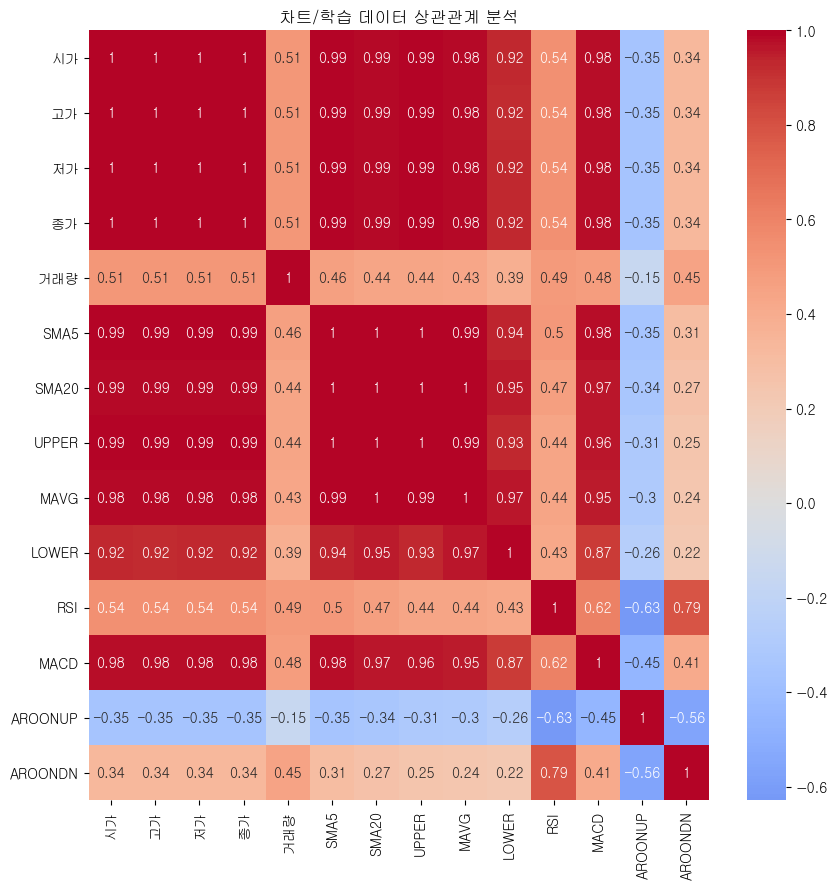

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix_charts, annot=True, cmap='coolwarm', center=0)
plt.title('차트/학습 데이터 상관관계 분석')
plt.show()

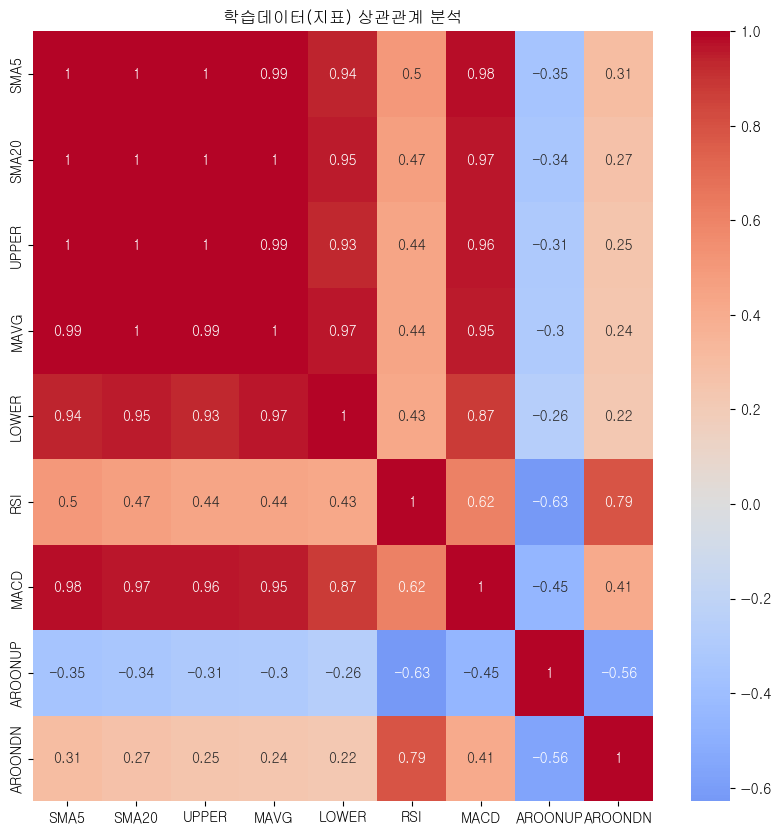

In [85]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix_training, annot=True, cmap='coolwarm', center=0)
plt.title('학습데이터(지표) 상관관계 분석')
plt.show()

In [73]:
charts_data_time = pd.DataFrame(or_data, columns=['날짜', '시간', '시가', '고가', '저가', '종가', '거래량'])
charts_data_time.head()

,날짜,시간,시가,고가,저가,종가,거래량
0,20220907,901,33500.0,33500.0,33450.0,0.0,190.0
1,20220907,902,33650.0,33650.0,33550.0,33650.0,210.0
2,20220907,903,33650.0,33750.0,33650.0,33650.0,319.0
3,20220907,904,33700.0,33700.0,33650.0,33650.0,462.0
4,20220907,905,33700.0,33700.0,33700.0,33700.0,589.0


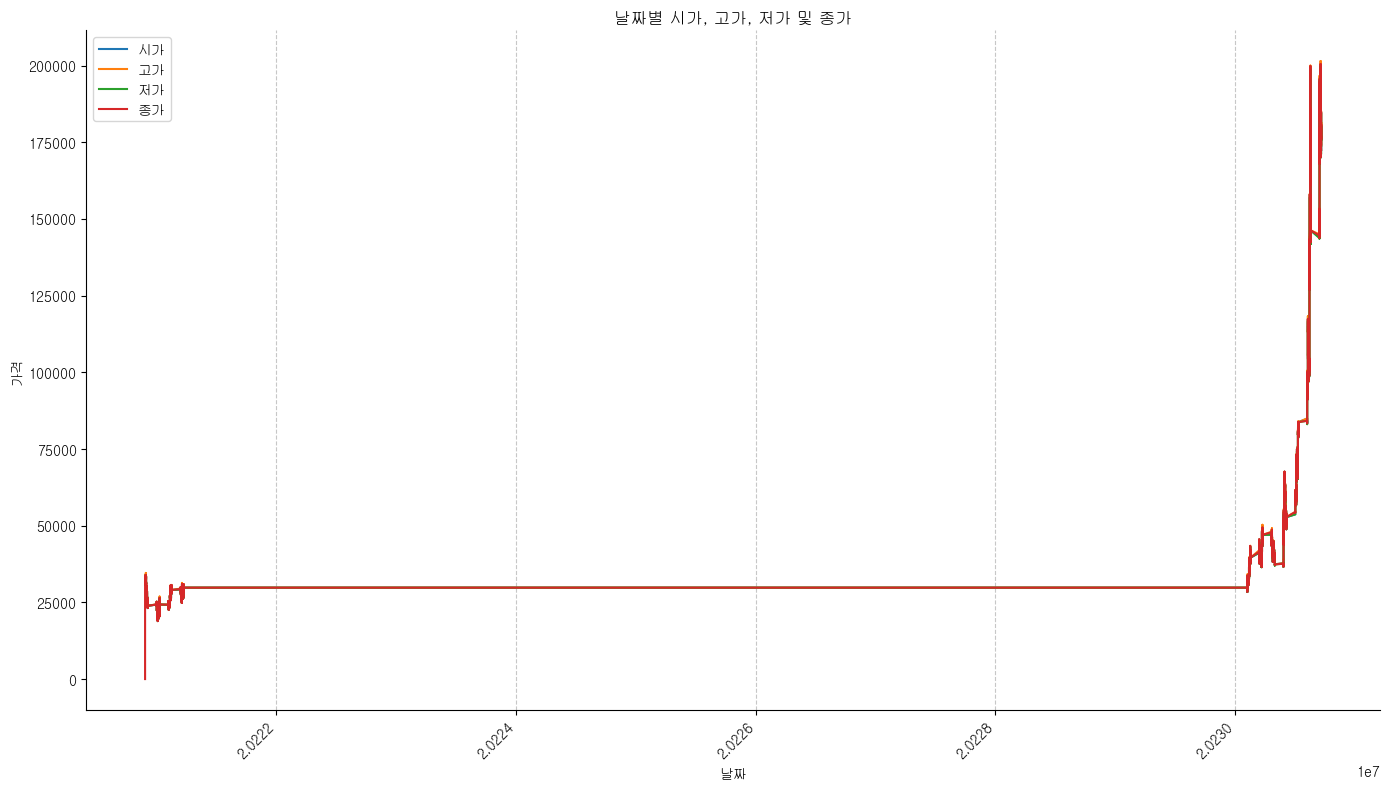

In [83]:
# 그래프 그리기
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(charts_data_time['날짜'], charts_data_time['시가'], label="시가")
ax.plot(charts_data_time['날짜'], charts_data_time['고가'], label="고가")
ax.plot(charts_data_time['날짜'], charts_data_time['저가'], label="저가")
ax.plot(charts_data_time['날짜'], charts_data_time['종가'], label="종가")

plt.xlabel("날짜")
plt.ylabel("가격")
plt.title("날짜별 시가, 고가, 저가 및 종가")
plt.legend()

# 그래프 꾸미기
plt.gca().spines['top'].set_visible(False)      # 위쪽 테두리 제거
plt.gca().spines['right'].set_visible(False)    # 오른쪽 테두리 제거
ax.grid(axis='x', linestyle='--', alpha=0.7)    # 세로 그리드선 추가

# x 축에 대한 날짜 눈금 간격 조절
# from matplotlib.dates import DateFormatter, AutoDateLocator
# date_locator = AutoDateLocator()
# ax.xaxis.set_major_locator(date_locator)
# date_formatter = DateFormatter("%Y-%m-%d")
# ax.xaxis.set_major_formatter(date_formatter)

# 눈금 간격 조절 후, x 축 눈금 라벨들을 회전시키기
fig.autofmt_xdate(rotation=45)

plt.tight_layout()
plt.show()

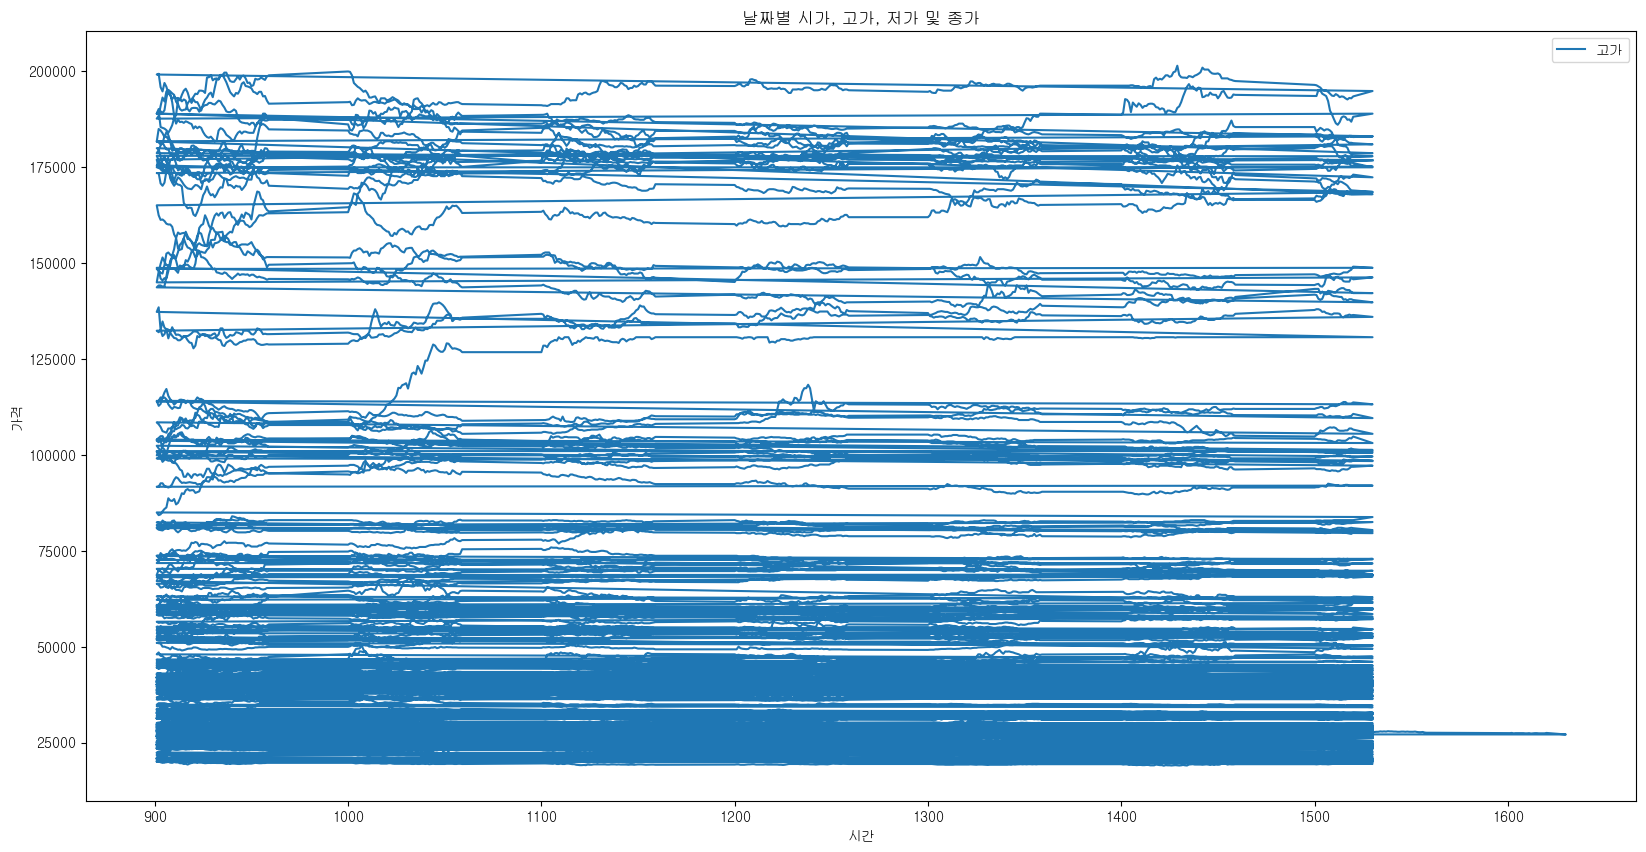

In [81]:
fig, ax = plt.subplots(figsize=(20, 10))
# ax.plot(charts_data_time['날짜'], charts_data_time['시가'], label="시가")
ax.plot(charts_data_time['시간'], charts_data_time['고가'], label="고가")
# ax.plot(charts_data_time['날짜'], charts_data_time['저가'], label="저가")
# ax.plot(charts_data_time['날짜'], charts_data_time['종가'], label="종가")

plt.xlabel("시간")
plt.ylabel("가격")
plt.title("날짜별 시가, 고가, 저가 및 종가")
plt.legend()
plt.show()

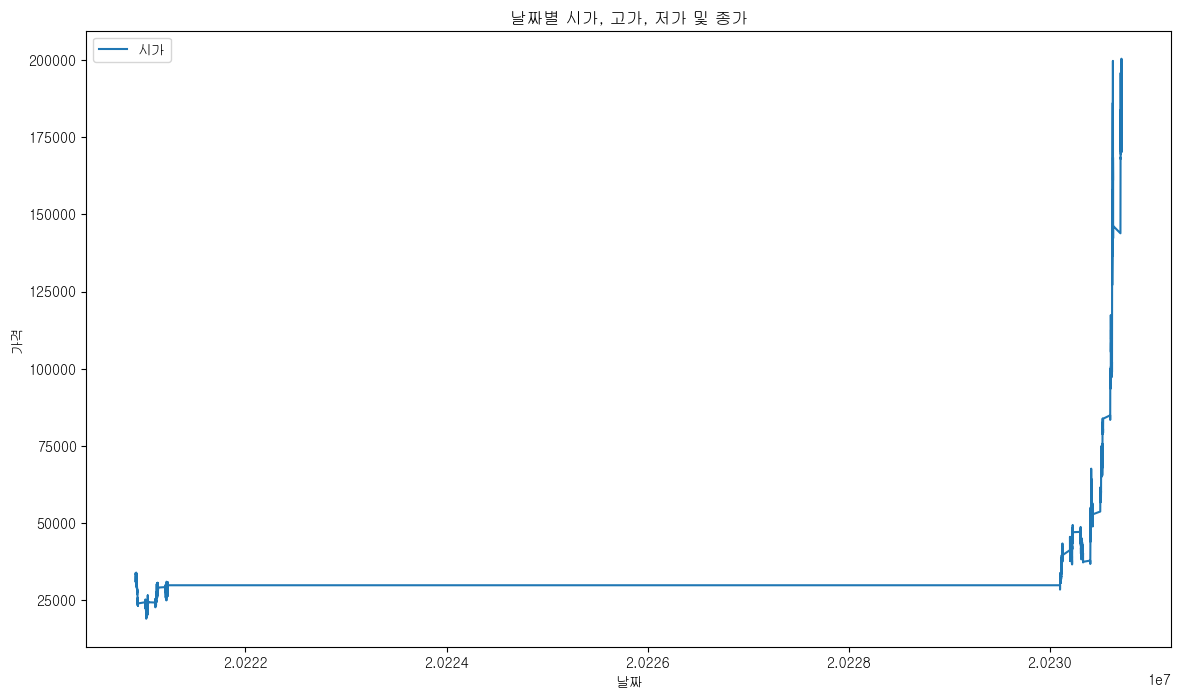

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(charts_data_time['날짜'], charts_data_time['시가'], label="시가")
# ax.plot(charts_data_time['날짜'], charts_data_time['고가'], label="고가")
# ax.plot(charts_data_time['날짜'], charts_data_time['저가'], label="저가")
# ax.plot(charts_data_time['날짜'], charts_data_time['종가'], label="종가")

plt.xlabel("날짜")
plt.ylabel("가격")
plt.title("날짜별 시가, 고가, 저가 및 종가")
plt.legend()
plt.show()

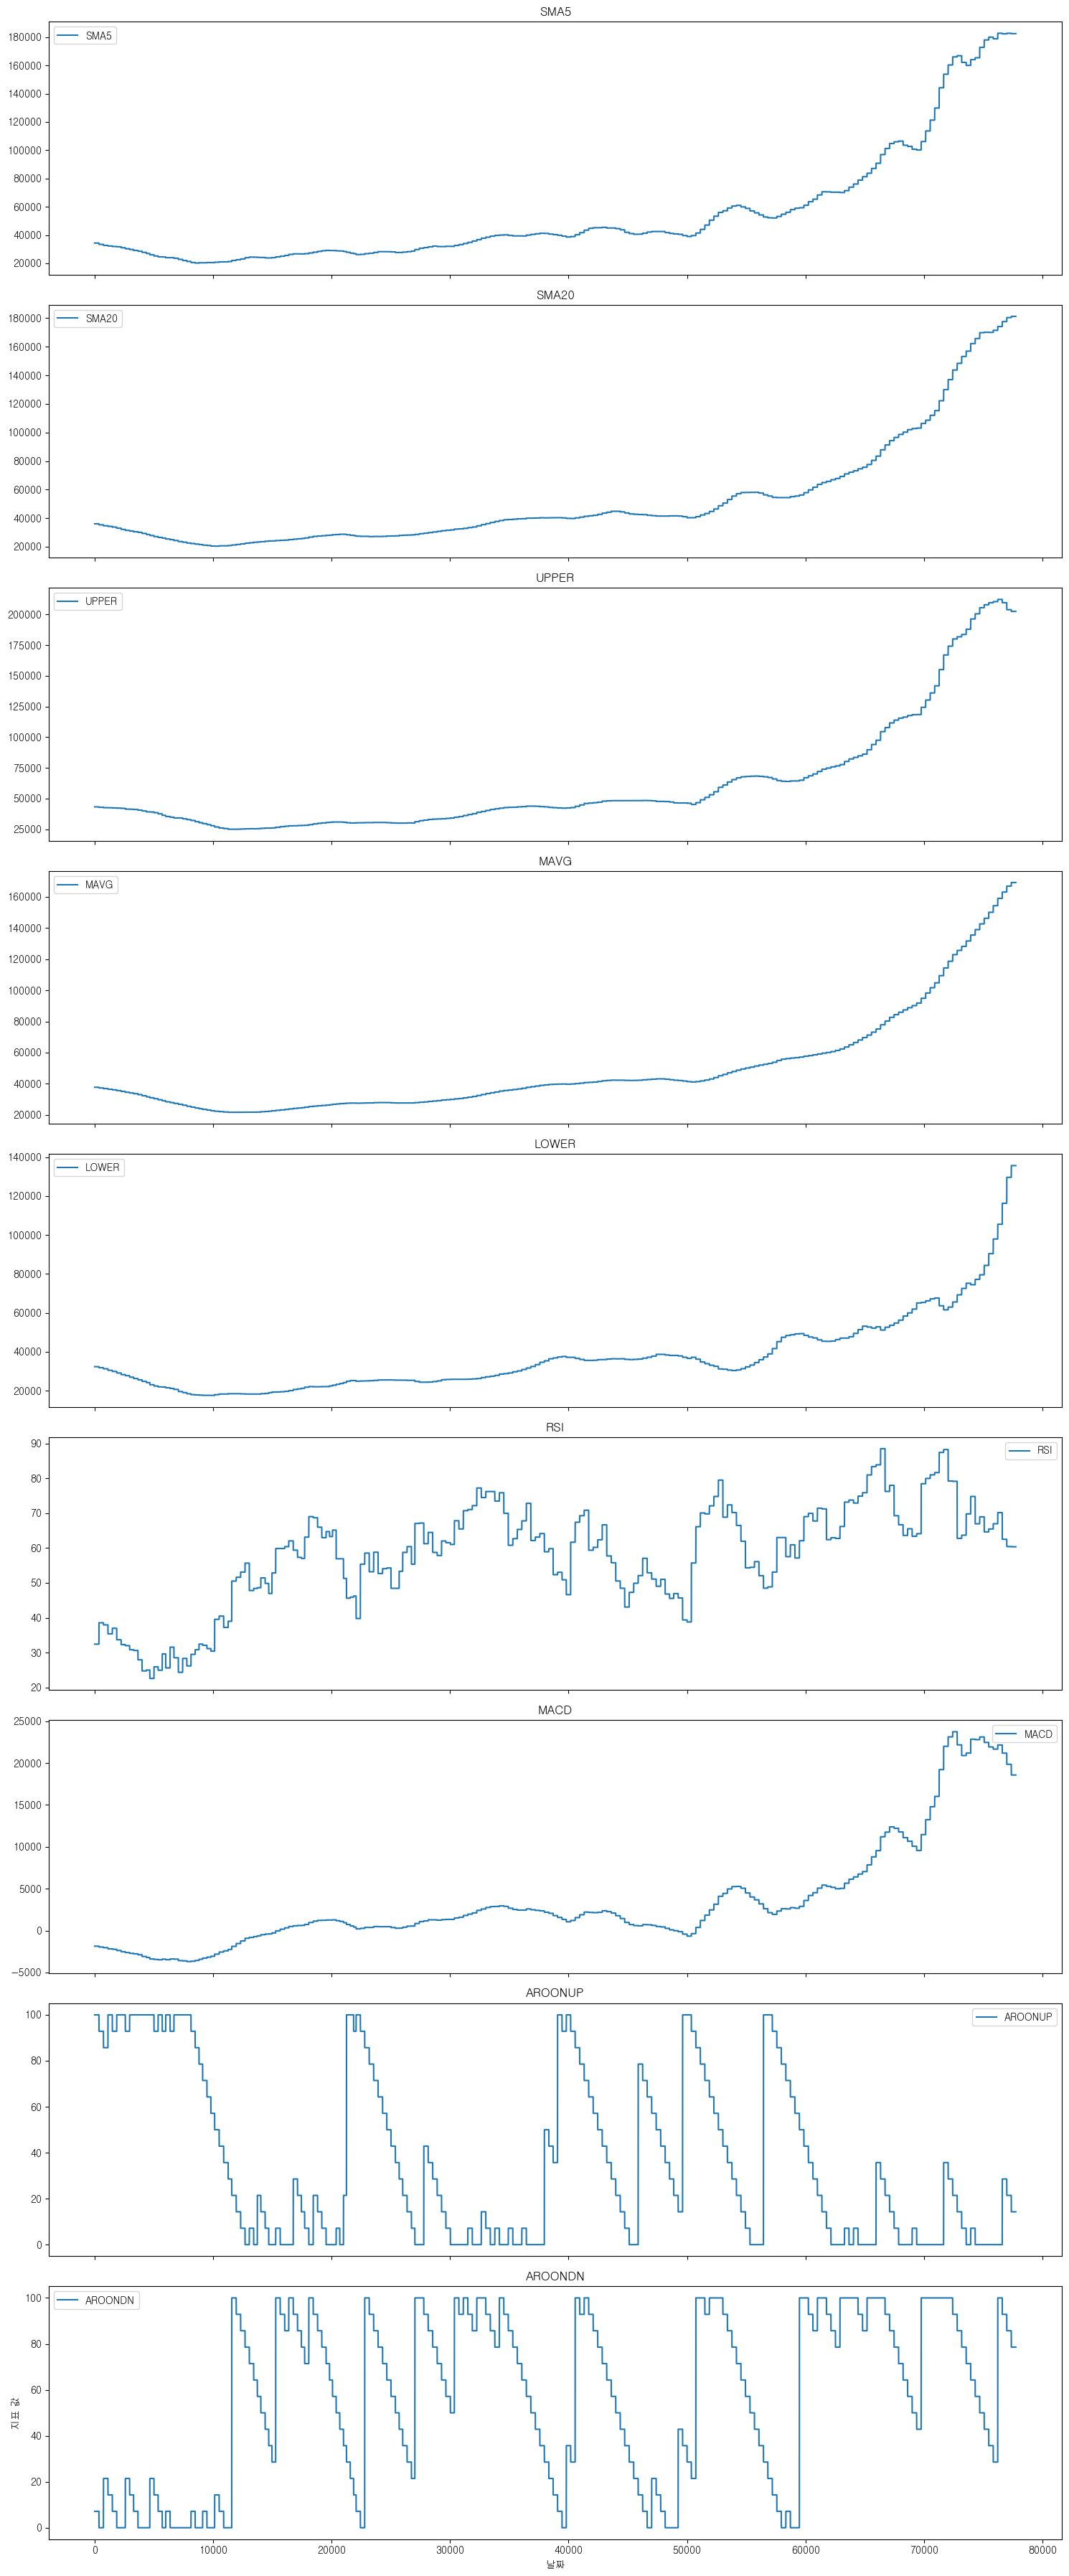

In [77]:
cols_to_plot = training_data.columns
num_of_cols = len(cols_to_plot)

fig, ax = plt.subplots(nrows=num_of_cols, ncols=1, figsize=(15, 4 * num_of_cols), sharex='col')

for i, col in enumerate(cols_to_plot):
    ax[i].plot(training_data.index, training_data[col], label=col)
    ax[i].set_title(col)
    ax[i].legend()

plt.xlabel("날짜")
plt.ylabel("지표 값")
plt.tight_layout()
plt.show()

- 정의한 함수를 통해서 입력 데이터 x_data_lstm, x_data_cnn, 출력 데이터 y_data_norm 및 스케일러 객체 scaler_x, scaler_y를 얻을 수 있습니다. 이 값을 모델 학습에 사용하고, 
- 예측한 값을 원래 크기로 되돌리려면 .inverse_transform() 메소드를 사용하시면 됩니다.

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError

# 더 깊은 CNN 신경망 모델 생성
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, padding='same', activation='tanh', input_shape=(x_data.shape[1], 1)))
model.add(BatchNormalization())
# model.add(MaxPoolD(pool_size=(2, 1)))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='tanh'))
model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 1)))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='tanh'))
model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 1)))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='tanh'))
model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 1)))
model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='tanh'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# 모델 학습
model.compile(optimizer='Nadam', loss='mse', metrics=['mae', 'mse', 'cosine_proximity'])
model.fit(x_data, y_data, epochs=100, batch_size=16)

# 학습된 모델 저장
model.save('deep_stock_cnn_model_rmse.h5')

Epoch 1/100
10244/10244 [==============================] - 322s 30ms/step - loss: 162078464.0000 - mae: 10637.6553 - mse: 162078464.0000 - cosine_proximity: 0.9999
Epoch 2/100
10244/10244 [==============================] - 285s 28ms/step - loss: 149141392.0000 - mae: 10010.9238 - mse: 149141392.0000 - cosine_proximity: 1.0000
Epoch 3/100
10244/10244 [==============================] - 279s 27ms/step - loss: 137058096.0000 - mae: 9386.6436 - mse: 137058096.0000 - cosine_proximity: 1.0000
Epoch 4/100
10244/10244 [==============================] - 336s 33ms/step - loss: 125854952.0000 - mae: 8768.5498 - mse: 125854952.0000 - cosine_proximity: 0.9998
Epoch 5/100
10244/10244 [==============================] - 278s 27ms/step - loss: 115421464.0000 - mae: 8150.1484 - mse: 115421464.0000 - cosine_proximity: 1.0000
Epoch 6/100
10244/10244 [==============================] - 301s 29ms/step - loss: 105868304.0000 - mae: 7541.9829 - mse: 105868304.0000 - cosine_proximity: 1.0000
Epoch 7/100
10244/10

KeyboardInterrupt: 

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization, Activation

# model = Sequential()

# # 첫 번째 Convolutional 블록
# model.add(Conv1D(128, kernel_size=3, padding='same', input_shape=(x_data.shape[1], 1)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.2))

# # 두 번째 Convolutional 블록
# model.add(Conv1D(64, kernel_size=3, padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.2))

# # 세 번째 Convolutional 블록
# model.add(Conv1D(32, kernel_size=3, padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.2))

# model.add(Flatten())

# # Dense 블록
# model.add(Dense(units=256))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# model.add(Dense(units=128))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# model.add(Dense(units=1, activation='linear'))

# # 모델 학습
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# model.fit(x_data, y_data, epochs=50, batch_size=32)

# # 학습된 모델 저장
# model.save('deep_stock_cnn_model.h5')

In [ ]:
Mean Absolute Error(MAE)
Mean Squared Error(MSE)
Root Mean Squared Error(RMSE)
Mean absolute percentage error(MAPE)
Cosine proximity

상기 함수 CNN 모델학습에 여러개 적용 가능여부와 코드 생성해줘

In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

# 저장된 모델 파일 로드
model_path = './deep_stock_cnn_model.h5'  # 저장된 모델 파일의 경로를 설정하세요.
model = load_model(model_path, encoding= )

# 새로운 최적화 함수, 손실 함수, 평가 지표 선택
optimizer = ['Nadam']
loss = ['mse']
metrics = ['mae', 'mse', 'cosine_proximity']

# 모델 컴파일
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# 모델 학습
# X_train, y_train, X_test, y_test 등등을 적절한 데이터셋으로 초기화하세요.
history = model.fit(X_train, y_train, epochs=50, batch_size=32, )

# 모델 저장
model.save('updated_cnn_model.h5')


TypeError: 'type' object is not a mapping